In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initializing start values

In [36]:
eps = 0.001
x = np.array([5.0,5.0])
max_iter = 100

Function to minimize

In [37]:
f = lambda x : pow(x[0],2) + 2*pow(x[1],2) + pow(math.exp(1),x[0]+x[1])

# Newton method

Function and it's derivative description

In [38]:
f_derivative = lambda x : np.array([2*x[0]+np.exp(x[0]+x[1]),4*x[1]+np.exp(x[0]+x[1])])
G = lambda x : np.array([[np.exp(x[0]+x[1])+2,np.exp(x[0]+x[1])],[np.exp(x[0]+x[1]),np.exp(x[0]+x[1])+4]])

In [39]:
def Newton(x,eps,m_iter):
    result = [x]
    values = [f(x)]
    x = x - np.dot(np.linalg.inv(G(x)),f_derivative(x))
    while np.linalg.norm(f_derivative(x)) > eps and m_iter > 0:
        result.append(x)
        values.append(f(x))
        x = x - np.dot(np.linalg.inv(G(x)),f_derivative(x))
        m_iter -= 1
    result.append(x)
    values.append(f(x))
    return result, values

In [40]:
xy, res = Newton(x,eps,max_iter)
xy

[array([5., 5.]),
 array([5.99963682, 2.99981841]),
 array([5.3320923 , 2.66604615]),
 array([4.66333591, 2.33166796]),
 array([3.99179155, 1.99589577]),
 array([3.31403629, 1.65701814]),
 array([2.62311168, 1.31155584]),
 array([1.90673714, 0.95336857]),
 array([1.1521068, 0.5760534]),
 array([0.39249227, 0.19624614]),
 array([-0.15756822, -0.07878411]),
 array([-0.30654065, -0.15327033]),
 array([-0.31275749, -0.15637875])]

In [41]:
#Function values steps
res

[22101.465794806703,
 8152.664306655247,
 3018.0607642065606,
 1123.7879556810974,
 422.3935600916692,
 160.65308916021036,
 61.4662145433265,
 22.916842647865572,
 7.62131089967262,
 2.032789226358011,
 0.8267440725692068,
 0.7723537402374675,
 0.7722682279146078]

Drawing graphics

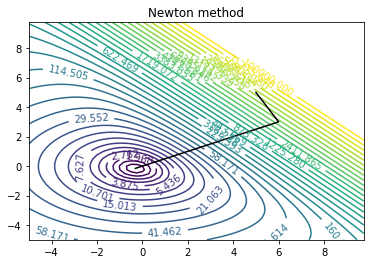

In [42]:
from matplotlib.colors import LogNorm

delta = 0.25
x = np.arange(-5.0, 10.0, delta)
y = np.arange(-5.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (lambda x_, y_: f((x_, y_)))(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm())
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(*zip(*xy), color='k')
ax.set_title('Newton method')
plt.show()

# Random Search

Init values of parametrs

In [43]:
#Radius of ball
d = 1
a = [2.0,0.5]
counter_success = 0
counter_defeat = 0
success_max = 5
defeat_max = 10
max_iter = 1000
x = (5,5)
eps = 0.001

In [44]:
def Random(d, a, c_s, c_d, s_m, d_m, eps, x, m_iter):
    result = [np.array(x)]
    values = [f(x)]
    y = np.random.uniform(-10,10,2)
    r = d/np.linalg.norm(y)*y
    while np.linalg.norm(f_derivative(y)) > eps and m_iter > 0:
        m_iter -= 1
        #If step is better set new value
        if np.linalg.norm(f_derivative(y)) < np.linalg.norm(f_derivative(x)):
            x = y
            result.append(x)
            values.append(f(x))
            c_s += 1
        else:
            c_d += 1
        #If defeat or success change step value
        if d_m < c_d:
            c_d = 0
            d *= a[1]
        if c_s > s_m:
            c_s = 0
            d *= a[0]
        y = np.random.uniform(-r,r,2)
        r = d/np.linalg.norm(y)*y
    return result,values

In [45]:
xy, res = Random(d,a,counter_success,counter_defeat,success_max,defeat_max,eps,x, max_iter)
xy

[array([5, 5]),
 array([-2.83710221, -6.66438758]),
 array([0.05219421, 0.75740533]),
 array([ 0.03838217, -0.49164772]),
 array([-0.00276001, -0.38517605]),
 array([-0.00845311, -0.07794119]),
 array([-0.07384884, -0.12416877]),
 array([-0.33881062, -0.0097014 ]),
 array([-0.08015883, -0.24145184])]

In [46]:
#Function values step points
res

[22101.465794806703,
 96.87734745125671,
 3.3970578899457315,
 1.1204574973881762,
 0.9751845192504444,
 0.9294536073795814,
 0.8566448256798894,
 0.8207183023906224,
 0.8480038123052851]

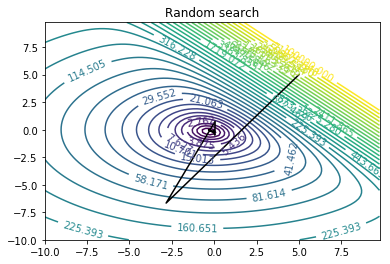

In [47]:
from matplotlib.colors import LogNorm

delta = 0.25
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (lambda x_, y_: f((x_, y_)))(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm())
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(*zip(*xy), color='k')
ax.set_title('Random search')
plt.show()